# Week 3: Portoflio Optimization Capstone

In this example we will construct an efficient frontier of portfolios of two risky assets -- stocks of Intel and National Instruments, find the tangency portfolio, and draw the capital market line.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define a vector of years and a matrix of prices and plot:

In [2]:
years = np.arange(2012,2022)
prices = np.array([[15.50, 20.29, 29.26, 28.62, 31.12, 40.73, 42.45, 55.49, 47.34, 50.20], 
                   [20.94, 26.47, 26.21, 24.80, 27.39, 37.82, 42.04, 40.16, 42.83, 43.67]])

print("years =",years)
print("prices =",prices)

years = [2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
prices = [[15.5  20.29 29.26 28.62 31.12 40.73 42.45 55.49 47.34 50.2 ]
 [20.94 26.47 26.21 24.8  27.39 37.82 42.04 40.16 42.83 43.67]]


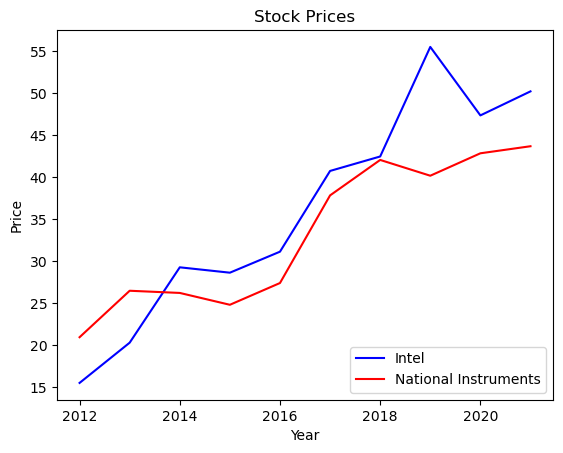

In [3]:
fig=plt.figure()
plt.plot(years, prices[0,:], color='b', label='Intel')
plt.plot(years, prices[1,:], color='r', label='National Instruments')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc='lower right')
plt.title('Stock Prices')
plt.show()

Compute returns as ratios of prices:

In [4]:
returns = prices[:,1:]/prices[:,0:-1]-1

Compute statistics:

In [5]:
exprets=returns.mean(axis=1)
vols=returns.std(axis=1)
corrmat=np.corrcoef(returns) # Correlation matrix

firm_names = ("INTC","NATI")
print('Expected Returns',firm_names,"\n", exprets)
print('Volatilities',firm_names,"\n", vols)
print('Correlation Matrix',firm_names,"\n", corrmat)

corr=corrmat[0,1]

# When we want to set the assets to uncorrelated, 
# we can uncomment this next line
#corr = 0.0

Expected Returns ('INTC', 'NATI') 
 [0.15426224 0.09318432]
Volatilities ('INTC', 'NATI') 
 [0.1830632  0.13733589]
Correlation Matrix ('INTC', 'NATI') 
 [[1.         0.25713364]
 [0.25713364 1.        ]]


We want to compute expected returns and volatilities for various portfolios that invest a fraction $w$ into Intel and $1-w$ into National Instruments. Define a vector of weights:

In [6]:
weights = np.linspace(0,1,1001)

From statistics, we remember that for two random variables $X$ with mean $\mu_X$, $Y$ with mean $\mu_Y$ and two scalars $a$, $b$,

$E[a X + b Y] = a E[X] + b E[Y] = a \mu_x + b \mu_y$

Use this property of expectations to compute expected portfolio returns:

In [7]:
portfolio_exprets = weights * exprets[0] + (1-weights) * exprets[1]

If $X$ is a random variable with mean $\mu_x$ and standard deviation $\sigma_x$ and $Y$ is a random variable with mean $\mu_y$ and standard deviation $\sigma_y$, and $a, b$ are scalars:

$\text{Var}[a X + b Y] = a^2 \text{Var}[X] + b^2 \text{Var}[Y] + 2 a b \text{Cov}[X,Y]$

Plugging in and taking the square root to get standard deviation from variance,

$\sigma_{[a X + b Y]} = \sqrt{ a^2 \sigma_x^2 + b^2 \sigma_y^2 + 2 a b \rho_{x,y} \sigma_x \sigma_y} $

where $\rho_{x,y}$ is the correlation between $X$ and $Y$.

In [8]:
portfolio_vols = np.sqrt( (weights * vols[0])**2 + ((1-weights) * vols[1])**2 \
                         + 2*weights*(1-weights)*corr*vols.prod() )
print(portfolio_vols.size)
print(portfolio_exprets.size)

1001
1001


Plot the frontier in (volatility, mean) space:

*Note: I am putting the plotting commands in the function so I can quickly make the same plot again later, as we add more lines to it. To make the plot again, I can just call the `plot_frontier()` function again.*

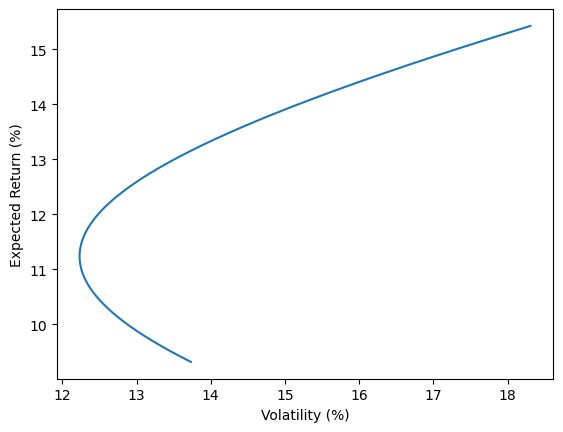

In [9]:
def plot_frontier():
    plt.plot(portfolio_vols*100, 100*portfolio_exprets, label='Frontier')
    plt.xlabel('Volatility (%)')
    plt.ylabel('Expected Return (%)')

plot_frontier()
plt.show()

Let's find the global minimum variance (GMV) portfolio. The `min()` method can give us the minimum volatility, but what we really want to know is which weight gives us that minimum volatility. To find this, we can take advantage of the `argmin()` method that tells us the *index* of the minimum element. We can then use this index to find which weights give us this portfolio -- the GMV weight on Intel will be the element of `weights` vector in the same position as the `argmin()` of the `portfolio_vols` vector. 

In [10]:
gmv_idx = portfolio_vols.argmin()
print(f'A portfolio that invests {weights[gmv_idx]:.1%} into Intel and ' \
      f'{1-weights[gmv_idx]:.1%} into National Instruments', \
      f'\nachieves volatility of {portfolio_vols[gmv_idx]:.2%} and', \
      f'expected return of {portfolio_exprets[gmv_idx]:.2%}.')

A portfolio that invests 31.4% into Intel and 68.6% into National Instruments 
achieves volatility of 12.23% and expected return of 11.24%.


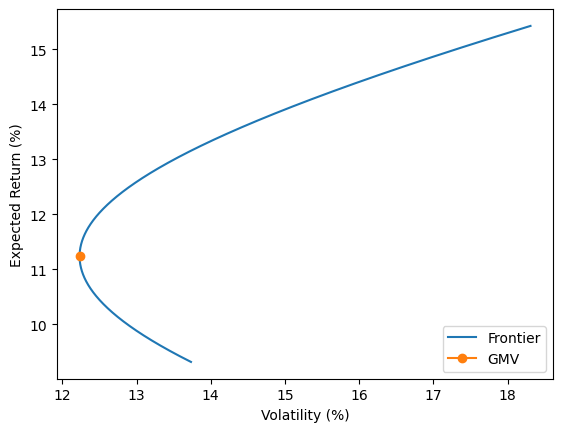

In [11]:
def plot_add_gmv(): 
    plot_frontier()
    plt.plot(100*portfolio_vols[gmv_idx], 100*portfolio_exprets[gmv_idx], marker='o', label='GMV')
    plt.legend(loc='lower right')

plot_add_gmv()
plt.show()

Next, we will find the tangency portfolio. Recall, the tangency portfolio defined as the point in the (volatility, expected return) space such that the capital allocation line (CAL) passing through the risk-free rate point (0, rf) and the tangency portfolio is *tangent* to the frontier at the tangency portfolio -- touches without crossing. This particular CAL is then known as the capital market line (CML).

First, let's plot the risk-free rate:

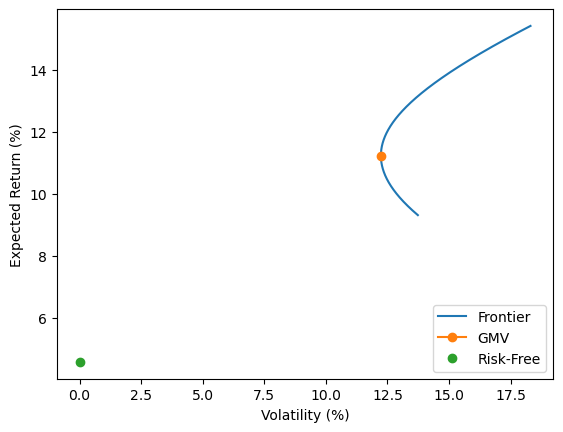

In [12]:
rfrate = 0.0458
#rfrate = 0.052

def plot_add_rf():
    plot_add_gmv()
    plt.plot(0,100*rfrate,'o',label='Risk-Free')
    plt.legend(loc='lower right')

plot_add_rf()
plt.show()

There are many possible CALs -- one for every point on the frontier, connecting the risk-free asset to that point. We need to find the one that's tangent to the frontier i.e. touches it without crossing it. Recall from your math classes that a line tangent to a curve has the same slope as the curve at the tangency point.

So for every weight, let's calculate (1) the slope of the frontier at that weight, and (2) the slope of the CAL passing through that portfolio's (volatility, expected return) point. The weight for which the slopes are closest will be our tangency portfolio:

First, CAL slopes. Each slope is a Sharpe Ratio of a portfolio that invests into the risk-free asset and the risky portfolio with those weights.

In [13]:
cal_slopes = (portfolio_exprets - rfrate) / (portfolio_vols - 0)

Next, frontier slopes. We can approximate them by dividing a small change in expected return by a small change in volatility:

In [14]:
frontier_slopes = (portfolio_exprets[1:] - portfolio_exprets[0:-1]) / \
    (portfolio_vols[1:] - portfolio_vols[0:-1])
# or alternatively, use the diff() function to compute differences between consecutive elements
frontier_slopes = np.diff(portfolio_exprets) / np.diff(portfolio_vols)

Note that

In [15]:
print('Size of cal_slopes:', cal_slopes.size)
print('Size of frontier_slopes:', frontier_slopes.size)

Size of cal_slopes: 1001
Size of frontier_slopes: 1000


We don't have the `frontier_slope` for the first weight b/c we don't have a previous weight's values to subtract from it. So let's get rid of the first element of `cal_slopes` too:

In [16]:
cal_slopes=cal_slopes[1:]

Now, let's find the point where the slopes are the closest. This will also be the highest attainable CAL slope i.e. the CAL with the highest possible Sharpe Ratio.

In [17]:
tangency_idx = abs(cal_slopes-frontier_slopes).argmin()
tan_sharpe=cal_slopes[tangency_idx]
tan_expret = portfolio_exprets[tangency_idx]
tan_vol = portfolio_vols[tangency_idx]
print(f'The tangency portfolio invests {weights[tangency_idx]:.1%} into Intel and ' \
      f'{1-weights[tangency_idx]:.1%} into National Instruments', \
      f'\nachieving a volatility {tan_vol:.2%} and', \
      f'expected return of {tan_expret:.2%} for a Sharpe Ratio of {tan_sharpe:0.3f}.')

The tangency portfolio invests 66.2% into Intel and 33.8% into National Instruments 
achieving a volatility 14.05% and expected return of 13.36% for a Sharpe Ratio of 0.625.


Plot it:

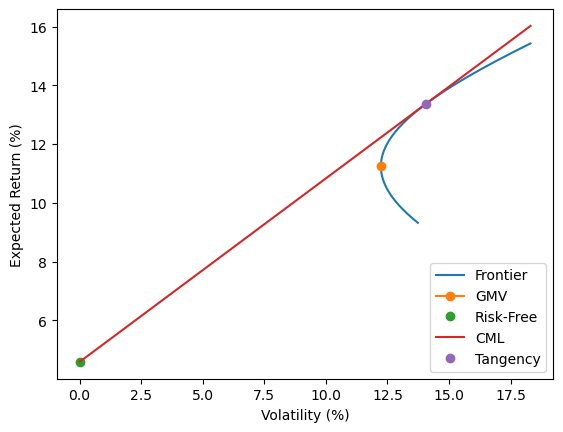

In [18]:
def plot_add_tangency():
    plot_add_rf()
    max_vol = vols.max()
    plt.plot(100*np.array([0, max_vol]), 100*np.array([rfrate, rfrate + tan_sharpe*max_vol]), label='CML')
    plt.plot(100*tan_vol,100*tan_expret,'o',label='Tangency')
    plt.legend(loc='lower right')

plot_add_tangency()
plt.show()

Our optimal investment must lie on the CML. The specific point is determined by our risk preferences. The more risk-averse we are, the higher weight we will put on the risk-free asset and the lower weight on the risky tangency portfolio. But our risk aversion does not affect the optimal mix of risky asset!

## Optional: Making an Interactive Plot

In the first example in Week 1, I showed you an interactive retirement calculator with sliders. To make it just right, I did a lot of customizations and the code looked quite complicated. But really, all you need is a function that takes as inputs parameters that you want to vary and produces the desired output.

Let's study how the correlation of our two risky assets affects the results. We will write a function that takes the correlation as an input and produces our key results -- the text description of the tangency portfolio and the plot.

The tangency portfolio invests 66.2% into Intel and 33.8% into National Instruments 
achieving a volatility 14.05% and expected return of 13.36% for a Sharpe Ratio of 0.625.


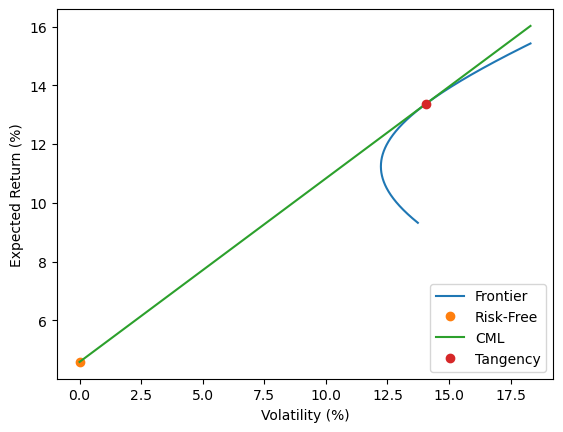

In [19]:
def calc_optimal_portfolio(rho = corr):
    portfolio_vols = np.sqrt( (weights * vols[0])**2 + ((1-weights) * vols[1])**2 \
                         + 2*weights*(1-weights)*rho*vols.prod() )
    cal_slopes = (portfolio_exprets - rfrate) / (portfolio_vols - 0)
    frontier_slopes = np.diff(portfolio_exprets) / np.diff(portfolio_vols)
    tangency_idx = abs(cal_slopes[1:]-frontier_slopes).argmin()
    tan_sharpe=cal_slopes[tangency_idx]
    tan_expret = portfolio_exprets[tangency_idx]
    tan_vol = portfolio_vols[tangency_idx]
    print(f'The tangency portfolio invests {weights[tangency_idx]:.1%} into Intel and ' \
          f'{1-weights[tangency_idx]:.1%} into National Instruments', \
          f'\nachieving a volatility {tan_vol:.2%} and', \
          f'expected return of {tan_expret:.2%} for a Sharpe Ratio of {tan_sharpe:0.3f}.')
    
    fig=plt.figure()
    plt.plot(portfolio_vols*100, 100*portfolio_exprets, label='Frontier')
    plt.plot(0,100*rfrate,'o',label='Risk-Free')
    maxvol = vols.max()
    plt.plot(100*np.array([0, maxvol]), 100*np.array([rfrate, rfrate + tan_sharpe*maxvol]), label='CML')
    plt.plot(100*tan_vol,100*tan_expret,'o',label='Tangency')
    plt.legend(loc='lower right')
    plt.xlabel('Volatility (%)')
    plt.ylabel('Expected Return (%)')
    plt.show()
    
calc_optimal_portfolio()

To make it interactive, we import the `interact` function from the `ipywidgets` library and call it, passing two arguments: the function we just created `calc_optimal_portfolio` and a tuple indicating the range of possible values of the function's argument `rho`.

In [20]:
from ipywidgets import interact
interact(calc_optimal_portfolio,rho=(-0.95,0.95,0.01));

interactive(children=(FloatSlider(value=0.25713364000027583, description='rho', max=0.95, min=-0.95, step=0.01…